#### If it gives rise to an Inexact error due to a complex number with a small imaginary part (which should really be a real number), run the code once again.

In [84]:
using Plots; using LsqFit

In [85]:
N=20;

In [86]:
x=range(0.5,0.999,N);

In [87]:
y=sqrt.(ones(N)-x)+(2*rand(N)-ones(N))/20;

In [88]:
@. model_function(x, p) = p[1]*(p[2]-x+0im)^p[3]

model_function (generic function with 1 method)

#### It works despite unrealistic initial parameters, as long as initial value of p[2] produces real results

In [89]:
initial_params = [0.01,2.0,0.01]

3-element Vector{Float64}:
 0.01
 2.0
 0.01

In [90]:
fit_result_nonlinear = curve_fit(model_function, x, y, initial_params)

LsqFit.LsqFitResult{Vector{Float64}, Vector{ComplexF64}, Matrix{ComplexF64}, Vector{Float64}}([1.020977913852191, 1.0078814461348717, 0.5227630676764901], ComplexF64[-0.030441973642433617 + 0.0im, -0.013143238805536583 + 0.0im, -0.013227792263135973 + 0.0im, -0.008017033984604627 + 0.0im, 0.028795204096898286 + 0.0im, 0.004606767846700888 + 0.0im, 0.014864449490172738 + 0.0im, 0.012852625264146433 + 0.0im, 0.01322291906641937 + 0.0im, 0.05144351671070657 + 0.0im, -0.03735166027412151 + 0.0im, 0.049697770307016886 + 0.0im, -0.02517949284732862 + 0.0im, -0.01604088961246558 + 0.0im, -0.04190951824769401 + 0.0im, 0.02661542456371374 + 0.0im, -0.01103256867611696 + 0.0im, -0.016890167255160904 + 0.0im, 0.0005011887913697333 + 0.0im, 0.006967814044399265 + 0.0im], ComplexF64[0.7017516172202056 + 0.0im 0.7374665389395719 + 0.0im -0.48541557305390126 + 0.0im; 0.6825411362809222 + 0.0im 0.7563923129403236 + 0.0im -0.5091278737687291 + 0.0im; … ; 0.17371151558406392 + 0.0im 2.6380996823413194 +

In [91]:
results_param = fit_result_nonlinear.param

3-element Vector{Float64}:
 1.020977913852191
 1.0078814461348717
 0.5227630676764901

In [92]:
yModel = real.(model_function(x, results_param));

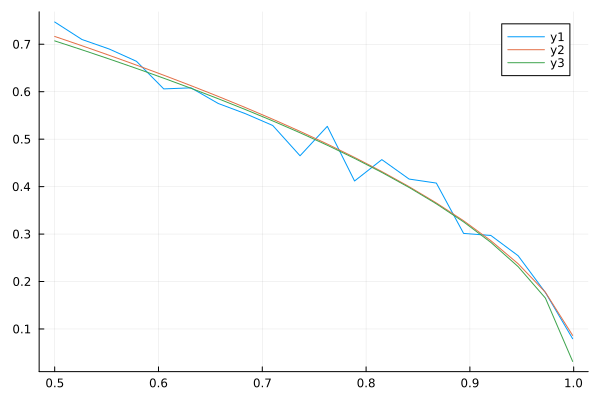

In [93]:
plt1 = plot(x,y);plt1 = plot!(x, yModel);plt1 = plot!(x,sqrt.(ones(N)-x))